In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
data.shape

(42, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

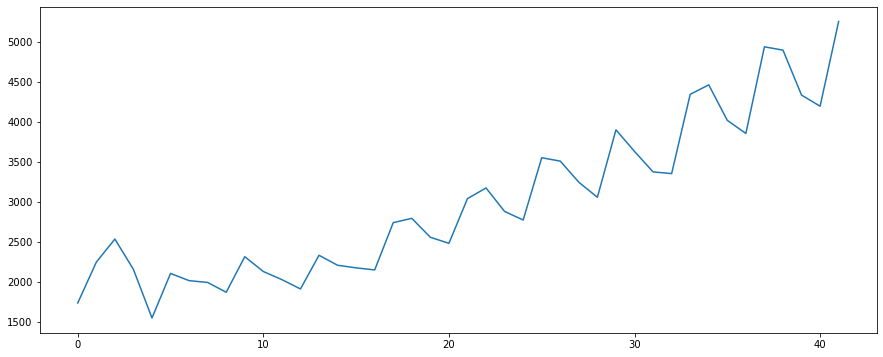

In [7]:
data['Sales'].plot(figsize=(15, 6))
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

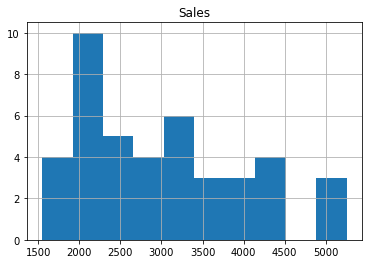

In [8]:
data.hist()

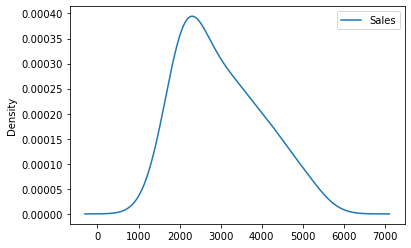

In [9]:
data.plot(kind="kde")
plt.show()

In [10]:
data1 = data.copy()

In [11]:
# Making seasonal_decompose graph from statsmodels.tsa.seasonal library And 
#Analysis the Trend, Seasonal And Residuals in dataset

In [12]:
temp = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_19564/3570800419.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [13]:
data1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [14]:
data1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [15]:
data1 = data1.drop(['Quarter'], axis=1)

In [16]:
data1.head()

,Sales,quater
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987


In [17]:
data1.reset_index(inplace=True)

In [18]:
data1['quater'] = pd.to_datetime(data1['quater'])

In [19]:
data1 = data1.set_index('quater')

In [20]:
data1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


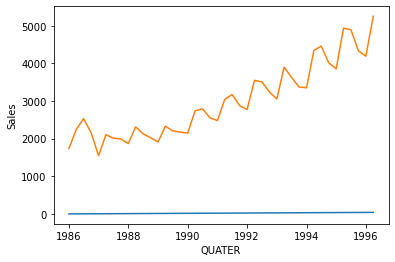

In [21]:
# Plot the graph between Date and Sales
plt.xlabel("QUATER");
plt.ylabel("Sales");
plt.plot(data1);

### Augmented Dickey-fuller test

In [22]:
from statsmodels.tsa.stattools import adfuller

#ADF statistic to check stationarity
t = data1["Sales"].values
timeseries = adfuller(t)
print('ADF Statistic: %f' % timeseries[0])
print('p-value: %f' % timeseries[1])
print('Critical Values:')
for key, value in timeseries[4].items():
 print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
 print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
 print ("Reject Ho - Time Series is Stationary")

ADF Statistic: 1.309421
p-value: 0.996661
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614
Failed to Reject Ho - Time Series is Non-Stationary


In [23]:
print("Observations of Dickey-fuller test")
dftest = adfuller(data1['Sales'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                  1.309421
p-value                         0.996661
#lags used                      7.000000
number of observations used    34.000000
critical value (1%)            -3.639224
critical value (5%)            -2.951230
critical value (10%)           -2.614447
dtype: float64


### Rolling Statistics Test

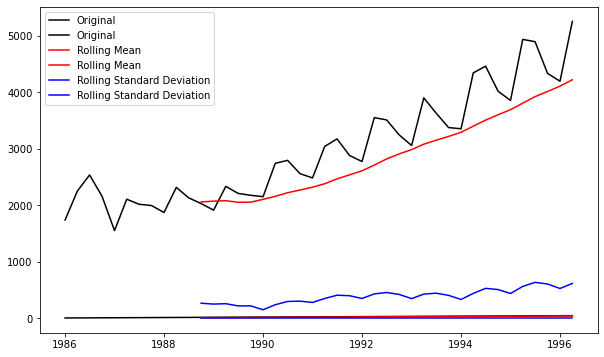

In [24]:
rmean=data1.rolling(window=12).mean()
rstd=data1.rolling(window=12).std()
# print(rmean,rstd)
plt.figure(figsize = (10,6))
orig=plt.plot(data1 , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')

In [25]:
# Now applying Log Transformtion for making Stationry dataset

In [26]:
dff = np.log(data1['Sales'])
dff

quater
1986-01-01    7.458663
1986-04-01    7.716443
1986-07-01    7.837477
1986-10-01    7.675529
1987-01-01    7.344602
1987-04-01    7.651791
1987-07-01    7.608058
1987-10-01    7.596767
1988-01-01    7.533186
1988-04-01    7.746574
1988-07-01    7.663088
1988-10-01    7.614228
1989-01-01    7.555175
1989-04-01    7.754123
1989-07-01    7.699185
1989-10-01    7.684309
1990-01-01    7.672422
1990-04-01    7.915461
1990-07-01    7.934783
1990-10-01    7.846203
1991-01-01    7.816407
1991-04-01    8.019456
1991-07-01    8.062154
1991-10-01    7.965199
1992-01-01    7.927324
1992-04-01    8.174703
1992-07-01    8.162801
1992-10-01    8.084519
1993-01-01    8.024862
1993-04-01    8.268475
1993-07-01    8.196712
1993-10-01    8.123558
1994-01-01    8.117312
1994-04-01    8.376090
1994-07-01    8.403128
1994-10-01    8.298291
1995-01-01    8.256867
1995-04-01    8.504311
1995-07-01    8.495970
1995-10-01    8.374015
1996-01-01    8.341410
1996-04-01    8.566555
Name: Sales, dtype: float64

In [27]:
data1['N_sales'] = dff
data1

,index,Sales,N_sales
quater,,,
1986-01-01,0,1734.827000,7.458663
1986-04-01,1,2244.960999,7.716443
1986-07-01,2,2533.804993,7.837477
1986-10-01,3,2154.962997,7.675529
1987-01-01,4,1547.818996,7.344602
1987-04-01,5,2104.411995,7.651791
1987-07-01,6,2014.362999,7.608058
1987-10-01,7,1991.746998,7.596767
1988-01-01,8,1869.049999,7.533186


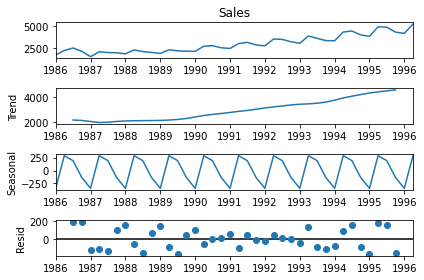

'\n# model : {"additive", "multiplicative"}-optional, Type of seasonal component. Abbreviations are accepted.\n# tsa = Time Series analysis  \n# seasonal_decompose = Seasonal decomposition using moving averages.'

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose   

ts_add = seasonal_decompose(data1['Sales'],model="additive")
fig = ts_add.plot()
plt.show()

'''
# model : {"additive", "multiplicative"}-optional, Type of seasonal component. Abbreviations are accepted.
# tsa = Time Series analysis  
# seasonal_decompose = Seasonal decomposition using moving averages.'''

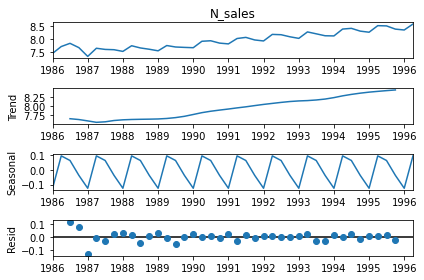

In [29]:
ts_add = seasonal_decompose(data1['N_sales'],model="additive")
fig = ts_add.plot()
plt.show()

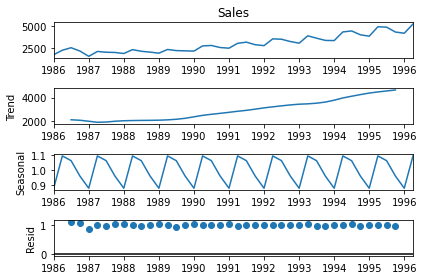

In [30]:
ts_add = seasonal_decompose(data1['Sales'],model="multiadditive")
fig = ts_add.plot()
plt.show()

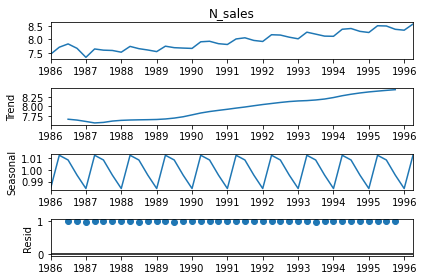

In [31]:
ts_add = seasonal_decompose(data1['N_sales'],model="multiadditive")
fig = ts_add.plot()
plt.show()

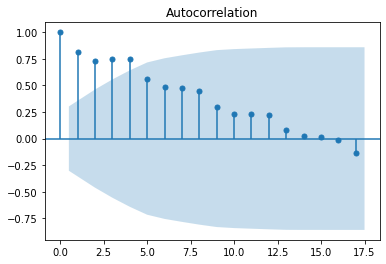

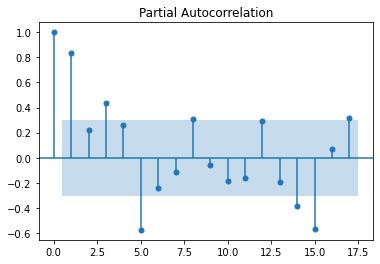

In [32]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1['Sales'])
tsa_plots.plot_pacf(data1['Sales'])
plt.show()

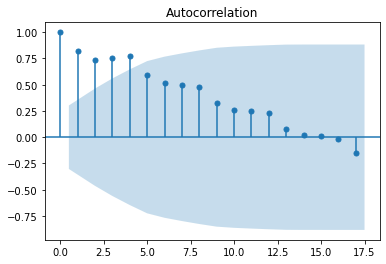

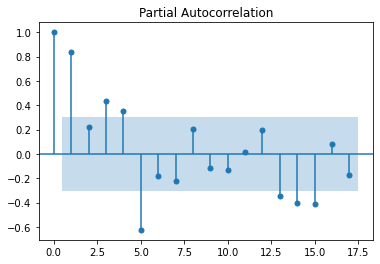

In [33]:
tsa_plots.plot_acf(data1['N_sales'])
tsa_plots.plot_pacf(data1['N_sales'])
plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
from pylab import rcParams
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [35]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

# (1) Building Time series forecasting with ARIMA

In [36]:
X = data1['N_sales'].values

In [37]:
X

array([7.45866298, 7.71644343, 7.8374774 , 7.67552883, 7.34460212,
       7.65179137, 7.60805829, 7.59676742, 7.53318556, 7.74657386,
       7.66308821, 7.61422778, 7.5551747 , 7.75412342, 7.69918549,
       7.68430935, 7.67242187, 7.91546061, 7.93478348, 7.84620273,
       7.8164065 , 8.01945587, 8.06215415, 7.96519864, 7.92732436,
       8.17470288, 8.16280135, 8.08451926, 8.02486215, 8.26847539,
       8.19671241, 8.12355784, 8.11731246, 8.37609035, 8.40312824,
       8.29829063, 8.25686685, 8.50431057, 8.49596955, 8.37401542,
       8.34141021, 8.56655462])

In [38]:
size = int(len(X) * 0.66)

In [39]:
train, test = X[0:size], X[size:len(X)]

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
# (from statsmodels.tsa.arima_model import ARIMA ) this is older library formate

model= ARIMA(train, order=(5,1,0))

In [42]:
model_fit = model.fit()

In [43]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  27.706
Date:                Fri, 16 Sep 2022   AIC                            -43.411
Time:                        17:50:09   BIC                            -35.862
Sample:                             0   HQIC                           -41.237
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1669      0.298     -0.561      0.575      -0.750       0.417
ar.L2         -0.2431      0.174     -1.400      0.161      -0.583       0.097
ar.L3         -0.1121      0.174     -0.645      0.5

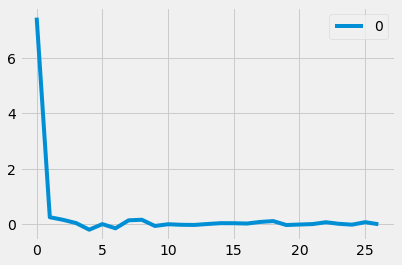

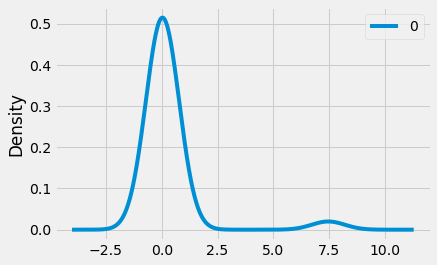

In [44]:
# Calculate residuals and plot it

residual = pd.DataFrame(model_fit.resid)
residual.plot()
pyplot.show()
residual.plot(kind='kde')
pyplot.show()

In [45]:
residual.describe()

,0
count,27.000000
mean,0.307413
std,1.432122
min,-0.192779
25%,-0.008871
50%,0.019634
75%,0.082757
max,7.458663


In [46]:
# The plot of the residual errors suggests that there may still be some trend information not captured by the model
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals

### Rolling Forecast ARIMA Model

In [47]:
history = [x for x in train]

In [48]:
predictions = list()

In [49]:
for t in range(len(test)):
    model1 = ARIMA(history, order=(5,1,0))
    model1_fit = model1.fit()
    output = model1_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predictions=%f, expected=%f' % (yhat, obs))

predictions=8.036766, expected=8.084519
predictions=8.059877, expected=8.024862
predictions=8.232270, expected=8.268475
predictions=8.215364, expected=8.196712
predictions=8.106363, expected=8.123558
predictions=8.091404, expected=8.117312
predictions=8.323982, expected=8.376090
predictions=8.261837, expected=8.403128
predictions=8.300997, expected=8.298291
predictions=8.287100, expected=8.256867
predictions=8.474444, expected=8.504311
predictions=8.490371, expected=8.495970
predictions=8.372248, expected=8.374015
predictions=8.345867, expected=8.341410
predictions=8.561881, expected=8.566555


In [50]:
Errors = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % Errors)

Test MSE: 0.002


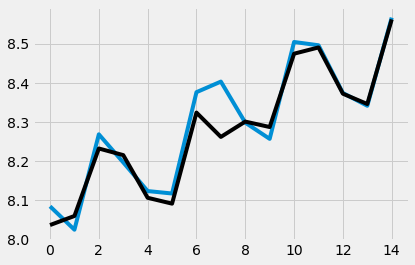

In [51]:
plt.plot(test)
plt.plot(predictions, color='black')
plt.show()

In [52]:
#A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). 
#We can see the values show some trend and are in the correct scale.

### (2) Comaring Multiple models

In [53]:
df2 = pd.get_dummies(data, columns = ['Quarter'])

In [54]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']


In [55]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
t = np.arange(1,43)

In [57]:
df2['t'] = t

In [58]:
df2['t_sq'] = df2['t'] * df2['t']  # doing square

In [59]:
log_Sales = np.log(df2['Sales'])  # doing Log

In [60]:
df2['log_Sales'] = log_Sales

In [61]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [62]:
train1, test1 = np.split(df2, [int(len(data1)*0.67)])

In [63]:
#Making Different seasonality Model

In [64]:
# Making Linear Model
lin = smf.ols('Sales~t',data=train1).fit()
pred_lin = pd.Series(lin.predict(pd.DataFrame(test1['t'])))
rmse_lin = np.sqrt((np.mean(np.array(test1['Sales'])-np.array(pred_lin))**2))
rmse_lin

580.1224130918641

In [65]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmse_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_quad))**2))
rmse_quad

783.7297975037103

In [66]:
expo=smf.ols('log_Sales~t',data=train1).fit()
pred_exp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmse_expo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_expo

588.1405104900134

In [67]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
pred_add=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_add=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add))**2))
rmse_add

1869.7188209186947

In [68]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
pred_add_linear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_add_linear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add_linear))**2))
rmse_add_linear

596.1526282372472

In [69]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_add_quad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(pred_add_quad))**2))
rmse_add_quad

412.1144436053775

In [70]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

2374.9194407954374

In [71]:
mul_lin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_lin= pd.Series(mul_lin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmse_mul_lin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_lin)))**2))
rmse_mul_lin

5359.687911932085

In [72]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467347524

In [73]:
# Conclusion of Different  Seasonality models

In [74]:
output = {'Model':pd.Series(['rmse_mul_quad',
                             'rmse_add',
                             'rmse_add_linear',
                             'rmse_add_quad',
                             'rmse_expo',
                             'rmse_lin',
                             'rmse_mul',
                             'rmse_mul_lin',
                             'rmse_quad']),
          'Values':pd.Series([rmse_mul_quad,
                             rmse_add,
                             rmse_add_linear,
                             rmse_add_quad,
                             rmse_expo,
                             rmse_lin,
                             rmse_mul,
                             rmse_mul_lin,
                             rmse_quad])}

In [75]:
rmse=pd.DataFrame(output)

In [76]:
rmse

,Model,Values
0,rmse_mul_quad,3630.561947
1,rmse_add,1869.718821
2,rmse_add_linear,596.152628
3,rmse_add_quad,412.114444
4,rmse_expo,588.140510
5,rmse_lin,580.122413
6,rmse_mul,2374.919441
7,rmse_mul_lin,5359.687912
8,rmse_quad,783.729798


In [77]:
# Additive seasonality with quadratic trend has the best RMSE value

## **Smoothing Techniques

In [78]:
Train = data.head(31)
Test = data.tail(10)

In [79]:
# Evaluation Metric MAPE

In [80]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [81]:
# Simple Exponential Method

In [82]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

23.033304211167383

In [83]:
# Holt's Method

In [84]:
holt_model = Holt(Train["Sales"]).fit(smoothing_level=0.75, smoothing_slope=0.25)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_holt,Test.Sales)

9.373149837341796

In [85]:
# Holts Winter Exponential Smoothing with Additive Seasonality and Additive Arend

In [86]:
'''Here select Seasonal and Trend = Additive and make model'''

hwe_model_add_add = ExponentialSmoothing(Train["Sales"],
                                         seasonal="add",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

8.103653344703542

In [87]:
print(hwe_model_add_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   31
Model:             ExponentialSmoothing   SSE                         665144.178
Optimized:                         True   AIC                            341.187
Trend:                         Additive   BIC                            364.131
Seasonal:                      Additive   AICC                           398.187
Seasonal Periods:                    12   Date:                 Fri, 16 Sep 2022
Box-Cox:                          False   Time:                         17:50:17
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8673554                alpha                 True
smoothing_trend          

In [88]:
# Holts Winter Exponential Smoothing with multiplicative Seasonality and Additive Arend

In [89]:
'''Here select Seasonal = multiplicative and Trend = Additive and make model'''

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],
                                         seasonal="mul",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

7.287822677653168

In [90]:
# Holts Winter Exponential Smoothing with Additive Seasonality and multiplicative Arend

In [91]:
'''Here select Seasonal = Additive and Trend = multiplicative and make model'''

hwe_model_add_mul = ExponentialSmoothing(Train["Sales"],
                                         seasonal="add",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_mul,Test.Sales)

4.717070413538275

In [92]:
# Holts Winter Exponential Smoothing with multiplicative Seasonality and multiplicative Arend

In [93]:
'''Here select Seasonal = multiplicative and Trend = multiplicative and make model'''

hwe_model_mul_mul = ExponentialSmoothing(Train["Sales"],
                                         seasonal="mul",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_mul,Test.Sales)

4.97681177919062

## Final Model by Combining Train and Test

In [94]:
final_model1 = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [95]:
#Forecasting for next 10 time periods

Value1 = final_model1.forecast(20)
Value1

42    4923.778390
43    4597.876931
44    4541.125613
45    5764.608179
46    5817.624243
47    5219.873527
48    4963.354682
49    6236.388074
50    6095.438034
51    5504.304477
52    5286.765771
53    6555.650255
54    6140.971001
55    5711.561851
56    5619.301655
57    7106.715248
58    7146.296152
59    6389.761093
60    6055.355672
61    7583.769149
dtype: float64

In [96]:
# Seasonal = Additive and Trend = Multiplicate

final_model2 = ExponentialSmoothing(data["Sales"],
                                    seasonal="add",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [97]:
#Forecasting for next 20 time periods

Value2 = final_model2.forecast(20)
Value2

42    4953.074217
43    4797.524378
44    4846.888023
45    5703.684859
46    5729.643376
47    5343.117602
48    5271.666879
49    6228.647810
50    6137.010390
51    5756.187232
52    5741.132987
53    6631.524170
54    6470.288341
55    6345.974522
56    6427.217266
57    7316.549520
58    7375.713285
59    7023.076381
60    6986.212224
61    7978.491779
dtype: float64

In [98]:
# Seasonal = Multiplicate and Trend = Multiplicate

final_model3 = ExponentialSmoothing(data["Sales"],
                                    seasonal="mul",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [99]:
Value3 = final_model3.forecast(20)
Value3

42    4961.081174
43    4645.380736
44    4610.205488
45    5883.024725
46    5971.888147
47    5373.109755
48    5136.912110
49    6500.788654
50    6382.882819
51    5765.748564
52    5586.724118
53    7026.808850
54    6618.977781
55    6197.776411
56    6150.846281
57    7849.016892
58    7967.576737
59    7168.698280
60    6853.567988
61    8673.225483
dtype: float64

In [100]:
# Seasonal = Additive and Trend = Additive

final_model4 = ExponentialSmoothing(data["Sales"],
                                    seasonal="add",
                                    trend="add",
                                    seasonal_periods=12).fit()

In [101]:
Value4 = final_model4.forecast(20)
Value4

42    4952.179130
43    4770.339808
44    4799.559682
45    5674.370110
46    5710.387064
47    5287.030513
48    5162.798355
49    6119.518265
50    6004.894163
51    5538.624650
52    5458.975047
53    6359.165001
54    6162.068088
55    5980.228766
56    6009.448640
57    6884.259068
58    6920.276022
59    6496.919471
60    6372.687313
61    7329.407223
dtype: float64